<a href="https://colab.research.google.com/github/ruchiraravishankar/level-5-project/blob/main/iam_dataset_binary_classifier_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import torch
import glob
import os
import pickle
from bs4 import BeautifulSoup
# data_path = '/Users/ruchiraravishankar/Downloads/iam_dataset/'
data_path = '/content/drive/MyDrive/iam_dataset/'

# print(glob.glob(data_path))

In [3]:
b_file = open("/content/drive/MyDrive/iam_dataset/d_i.pkl", "rb")
d_i = pickle.load(b_file)
print(d_i)

{'e01-062': '213', 'e01-059': '213', 'e01-086': '214', 'e01-092': '215', 'e01-102': '215', 'e01-113': '216', 'e01-107': '216', 'e02-014': '219', 'e01-119': '217', 'e02-000': '218', 'e02-018': '220', 'e02-021': '221', 'e02-025': '222', 'e02-074': '223', 'e02-082': '224', 'e02-086': '225', 'e02-091': '226', 'e02-094': '227', 'e02-100': '228', 'e02-117': '229', 'e04-000': '158', 'e04-008': '230', 'e04-011': '231', 'e04-004': '230', 'e04-015': '231', 'e04-022': '232', 'e04-019': '232', 'e04-026': '233', 'e04-030': '233', 'e04-038': '234', 'e04-034': '234', 'e04-052': '235', 'e04-043': '235', 'e04-058': '236', 'e04-062': '237', 'e04-079': '238', 'e04-068': '237', 'e04-083': '239', 'e04-086': '240', 'e04-091': '241', 'e04-095': '241', 'e04-109': '242', 'e04-103': '242', 'e04-099': '241', 'e04-114': '242', 'e04-119': '243', 'e04-124': '243', 'e04-127': '243', 'e04-132': '241', 'e06-000': '206', 'e06-006': '202', 'e06-003': '204', 'e06-021': '206', 'e06-010': '203', 'e06-015': '204', 'e06-030'

In [4]:
form_writer_list = list(d_i.items())

In [5]:
from collections import Counter

top_writers = []
num_writers = 50 # taking the top 50 writers
writers_counter = Counter(d_i.values())
for writer_id,_ in writers_counter.most_common(num_writers):
    top_writers.append(writer_id)

print(top_writers)

['000', '384', '551', '552', '588', '635', '670', '671', '152', '150', '151', '154', '153', '333', '334', '336', '337', '338', '339', '340', '341', '342', '343', '345', '344', '347', '346', '348', '349', '634', '155', '332', '335', '315', '118', '415', '209', '085', '567', '206', '202', '204', '203', '205', '207', '208', '247', '248', '273', '274']


In [6]:
top_forms = []
for form_id, author_id in d_i.items():
    if author_id in top_writers:
        top_forms.append(form_id)
print(top_forms)

['e06-000', 'e06-006', 'e06-003', 'e06-021', 'e06-010', 'e06-015', 'e06-030', 'e06-026', 'e06-033', 'e06-037', 'e06-046', 'e06-041', 'e06-053', 'e06-049', 'e07-000', 'e06-070', 'e07-079', 'e07-076', 'e07-086', 'e07-083', 'e07-090', 'e07-094', 'e07-105', 'e07-098', 'e07-101', 'e07-108', 'f04-007', 'f04-020', 'g03-049', 'g04-007', 'g04-011', 'g04-014', 'g04-017', 'g04-026', 'g04-032', 'g04-095', 'g06-011a', 'g05-098', 'g06-011b', 'g06-011c', 'g06-011e', 'g06-011f', 'g06-011g', 'g06-011h', 'g06-011i', 'g06-011j', 'g06-011k', 'g06-011l', 'g06-011n', 'g06-011m', 'g06-011p', 'g06-011o', 'g06-018a', 'g06-011r', 'g06-018c', 'g06-018d', 'g06-018b', 'g06-018g', 'g06-018f', 'g06-018e', 'g06-018h', 'g06-018i', 'g06-018l', 'g06-018j', 'g06-018k', 'g06-018n', 'g06-018m', 'g06-018o', 'g06-018p', 'g06-018r', 'g06-026b', 'g06-026a', 'g06-026e', 'g06-026d', 'g06-026c', 'g06-026g', 'g06-026f', 'g06-026i', 'g06-026h', 'g06-026j', 'g06-026l', 'g06-026k', 'g06-026o', 'g06-026m', 'g06-026n', 'g06-026r', 'g06

In [7]:
import os
import glob
import shutil

# Create temp directory to save writers' forms in (assumes files have already been copied if the directory exists)
temp_sentences_path = data_path + "/temp_sentences"
if not os.path.exists(temp_sentences_path):
    os.makedirs(temp_sentences_path)
    # Copy forms that belong to the top 50 most common writers to the temp directory
    original_sentences_path = data_path + "/sentences/**/**/*.png"
    for file_path in glob.glob(original_sentences_path):
        image_name = file_path.split('/')[-1]  
        file_name, _ = os.path.splitext(image_name)
        form_id = '-'.join(file_name.split('-')[0:2])
        if form_id in top_forms:
            shutil.copy2(file_path, temp_sentences_path + "/" + image_name)

In [8]:
img_files = np.zeros((0), dtype=str)
print(img_files)
img_targets = np.zeros((0), dtype=str)
print(img_targets)
sentence_dict = {}
path_to_files = os.path.join(temp_sentences_path, '*')
for file_path in glob.glob(path_to_files):
    img_files = np.append(img_files, file_path)
    file_name, _ = os.path.splitext(file_path.split('/')[-1]  )
    form_id = '-'.join(file_name.split('-')[0:2])
    for key in d_i:
        if key == form_id:
            img_targets = np.append(img_targets, d_i[form_id])
#             sentence_dict[d_i[form_id]] = form_id

[]
[]


In [9]:
print(img_files.shape)
print(img_targets.shape)

print(Counter(img_targets).keys())
print(Counter(img_targets).values())

(4901,)
(4901,)
dict_keys(['551', '552', '567', '315', '588', '634', '635', '670', '671', '340', '339', '341', '342', '343', '344', '345', '346', '347', '348', '332', '333', '334', '335', '336', '337', '338', '349', '274', '118', '384', '415', '247', '248', '273', '150', '151', '152', '153', '154', '155', '202', '203', '204', '205', '206', '207', '208', '209', '085', '000'])
dict_values([129, 127, 87, 73, 133, 134, 95, 116, 129, 83, 91, 101, 95, 81, 99, 107, 105, 86, 87, 82, 104, 89, 71, 82, 75, 80, 84, 45, 52, 117, 87, 60, 54, 45, 104, 99, 101, 111, 108, 95, 63, 43, 60, 55, 50, 56, 53, 71, 54, 693])


In [10]:
sen_dict = {}

for i in range(len(img_targets)):
    if img_targets[i] not in sen_dict.keys():
        sen_dict[img_targets[i]] = [img_files[i]]
    else:
        sen_dict[img_targets[i]].append(img_files[i])

In [11]:
# print(len(sen_dict.values()))
number_of = []
writer_ids = []
for key, value in sorted(sen_dict.items()):
    writer_ids.append(key)
    number_of.append(len([item for item in value if item]))
print(len(writer_ids))


50


In [12]:
labelled_data = np.stack([img_files, img_targets], axis=1)

print(labelled_data.shape)

(4901, 2)


In [13]:
from sklearn.utils import shuffle
from PIL import Image
import random

CROP_SIZE = 113
NUM_LABELS = 50

def get_augmented_sample(sample, label, sample_ratio):
    # Get current image details
    img = Image.open(sample)
    img_width = img.size[0]
    img_height = img.size[1]

    # Compute resize dimensions such that aspect ratio is maintained
    height_fac = CROP_SIZE / img_height
    size = (int(img_width * height_fac), CROP_SIZE)

    # Resize image 
    new_img = img.resize((size), Image.ANTIALIAS)
    new_img_width = new_img.size[0]
    new_img_height = new_img.size[1]

    # Generate a random number of crops of size 113x113 from the resized image
    x_coord = list(range(0, new_img_width - CROP_SIZE))
    num_crops = int(len(x_coord) * sample_ratio)
    random_x_coord = random.sample(x_coord, num_crops)
    
    # Create augmented images (cropped forms) and map them to a label (writer)
    images = []
    labels = []
    for x in random_x_coord:
        img_crop = new_img.crop((x, 0, x + CROP_SIZE, CROP_SIZE))
        # Transform image to an array of numbers
        images.append(np.asarray(img_crop))
        labels.append(label)

    return images, labels

In [14]:
transformed, labels = get_augmented_sample(labelled_data[0,0], labelled_data[0,1],0.05)

In [15]:
print(len(transformed))

5


In [16]:
196*2+1

393

In [17]:
labelled_data_0 = labelled_data[labelled_data[:,1] == '000']

print(labelled_data_0.shape)

labelled_data_0 = labelled_data_0[197:(196*2+1)] # different set of data to the one that its originally trained on
print(labelled_data_0.shape)

print(np.unique(labelled_data_0[:,1]))

(693, 2)
(196, 2)
['000']


In [18]:
# writer_list = list(sen_dict.keys())

# print(np.array(writer_list).shape)

# print(writer_list)

In [19]:
remove_000 = labelled_data[labelled_data[:,1]!='000']

print(np.unique(remove_000[:,1]))
print(np.unique(remove_000[:,1]).shape)

['085' '118' '150' '151' '152' '153' '154' '155' '202' '203' '204' '205'
 '206' '207' '208' '209' '247' '248' '273' '274' '315' '332' '333' '334'
 '335' '336' '337' '338' '339' '340' '341' '342' '343' '344' '345' '346'
 '347' '348' '349' '384' '415' '551' '552' '567' '588' '634' '635' '670'
 '671']
(49,)


In [20]:
y = [remove_000[remove_000[:,1]==k] for k in np.unique(remove_000[:,1])]
print(len(y))

49


In [21]:
labelled_data_1 = []
for i in y:
    labelled_data_1.append(i[5:9]) # different set of data to the one that its originally trained on
print(len(labelled_data_1))

labelled_data_1 = np.array(labelled_data_1)

print(labelled_data_1.shape)

49
(49, 4, 2)


In [22]:
labelled_data_1=labelled_data_1.reshape(-1,2)

In [23]:
print(labelled_data_1.shape)

(196, 2)


In [24]:
print(np.unique(labelled_data_1[:,1]))

['085' '118' '150' '151' '152' '153' '154' '155' '202' '203' '204' '205'
 '206' '207' '208' '209' '247' '248' '273' '274' '315' '332' '333' '334'
 '335' '336' '337' '338' '339' '340' '341' '342' '343' '344' '345' '346'
 '347' '348' '349' '384' '415' '551' '552' '567' '588' '634' '635' '670'
 '671']


In [25]:
# print(labelled_data_1)

In [26]:
labelled_data_new = np.concatenate((labelled_data_0, labelled_data_1))
np.random.shuffle(labelled_data_new)
print(labelled_data_new.shape) # mix of sentences from writer id 0 and others, labelled

(392, 2)


In [27]:
# split before augmenting to ensure the sentences are being split and not the augmented samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(labelled_data_new[:,0], labelled_data_new[:,1], test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(262,) (130,) (262,) (130,)


In [28]:
def augment(data, labels):
    augmented_sample_list = []
    augmented_label_list = []
    for i in range(len(data)):
        augmented_samples, augmented_labels = get_augmented_sample(data[i], labels[i],0.1)
        augmented_sample_list.append(augmented_samples)
        augmented_label_list.append(augmented_labels)
    return augmented_sample_list, augmented_label_list

In [29]:
augsamps, auglbls = augment(X_train, y_train) # returns two lists of arrays
ausamps_test, auglbls_test = augment(X_test, y_test)

In [30]:
import operator
from functools import reduce

# flattening the lists
aug_samps = reduce(operator.add, augsamps)
aug_lbls = reduce(operator.add, auglbls)

aug_samps_test = reduce(operator.add, ausamps_test)
aug_lbls_test = reduce(operator.add, auglbls_test)
print(len(aug_samps))
print(len(aug_lbls))

print(len(aug_samps_test))
print(len(aug_lbls_test))

44485
44485
19693
19693


In [31]:
# converting lists to arrays
aug_samps_arr = np.array(aug_samps)
aug_lbls_arr = np.array(aug_lbls)
aug_samps_arr_test = np.array(aug_samps_test)
aug_lbls_arr_test = np.array(aug_lbls_test)

print(aug_samps_arr.shape)
print(aug_lbls_arr.shape)
print(aug_samps_arr_test.shape)
print(aug_lbls_arr_test.shape)

(44485, 113, 113)
(44485,)
(19693, 113, 113)
(19693,)


In [32]:
X_train = aug_samps_arr
X_train = X_train.reshape(X_train.shape[0], 1, CROP_SIZE, CROP_SIZE)
X_train = X_train.astype('float16')
# X_data /= 255
X_train /= 255.0
y_train = aug_lbls_arr


X_test = aug_samps_arr_test
X_test = X_test.reshape(X_test.shape[0], 1, CROP_SIZE, CROP_SIZE)
X_test = X_test.astype('float16')
X_test /= 255.0
y_test = aug_lbls_arr_test



In [33]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(44485, 1, 113, 113)
(44485,)
(19693, 1, 113, 113)
(19693,)


In [34]:
new = np.unique(y_train)
print(new)

y_train[y_train !='000'] = 1
new = np.unique(y_train)
print(new)

y_train[y_train=='000'] = 0
new = np.unique(y_train)
print(new)

print(y_train.shape)

y_train = y_train.astype('float16')

print(np.unique(y_train))

['000' '085' '118' '150' '151' '152' '153' '154' '155' '202' '203' '204'
 '205' '206' '207' '208' '209' '247' '248' '273' '274' '315' '332' '333'
 '334' '335' '336' '337' '338' '339' '340' '341' '342' '343' '344' '345'
 '346' '347' '348' '349' '384' '415' '551' '552' '567' '588' '634' '635'
 '670' '671']
['000' '1']
['0' '1']
(44485,)
[0. 1.]


In [35]:
new = np.unique(y_test)
print(new)

y_test[y_test !='000'] = 1
new = np.unique(y_test)
print(new)

y_test[y_test=='000'] = 0
new = np.unique(y_test)
print(new)

print(y_test.shape)

y_test = y_test.astype('float16')

print(np.unique(y_test))

['000' '085' '150' '152' '153' '154' '203' '204' '205' '207' '209' '247'
 '248' '273' '274' '315' '332' '333' '334' '335' '337' '338' '341' '342'
 '343' '345' '346' '347' '384' '415' '551' '552' '567' '588' '634' '635'
 '670' '671']
['000' '1']
['0' '1']
(19693,)
[0. 1.]


In [36]:
torch.manual_seed(42)
CUDA = torch.cuda.is_available()

device = torch.device('cuda' if CUDA else 'cpu')
kwargs = {'num_workers': 1, 'pin_memory': True} if CUDA else {}
device

device(type='cuda')

In [37]:
from torch.utils.data import TensorDataset, DataLoader

if CUDA:
  tensor_x_train = torch.Tensor(X_train).type(torch.cuda.FloatTensor) # transform to torch tensor
  tensor_y_train = torch.Tensor(y_train).type(torch.cuda.FloatTensor).long()
else:
  tensor_x_train = torch.Tensor(X_train).type(torch.FloatTensor) # transform to torch tensor
  tensor_y_train = torch.Tensor(y_train).type(torch.FloatTensor).long()

train_dataset = TensorDataset(tensor_x_train,tensor_y_train) # create your datset
train_dataloader = DataLoader(train_dataset,batch_size=16, shuffle=True, drop_last=True) # create your dataloader

In [38]:
if CUDA:
  tensor_x_test = torch.Tensor(X_test).type(torch.cuda.FloatTensor) # transform to torch tensor
  tensor_y_test = torch.Tensor(y_test).type(torch.cuda.FloatTensor).long()
else:
  tensor_x_test = torch.Tensor(X_test).type(torch.FloatTensor) # transform to torch tensor
  tensor_y_test = torch.Tensor(y_test).type(torch.FloatTensor).long()

test_dataset = TensorDataset(tensor_x_test,tensor_y_test) # create your datset
test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=False, drop_last=True) # create your dataloader

In [39]:
tensor_x_train.shape

torch.Size([44485, 1, 113, 113])

In [40]:
from torch import nn
class Binary_Classifier(nn.Module): 
    def __init__(self):
        super(Binary_Classifier, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=10, kernel_size=3)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=3)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(13520, 1024)
        self.fc2 = nn.Linear(1024, 2)
        self.relu = nn.ReLU()
        self.max_pool2d = nn.MaxPool2d(2)
    def forward(self, x):
        x = self.relu(self.max_pool2d(self.conv1(x)))
        x = self.relu(self.max_pool2d(self.conv2_drop(self.conv2(x))))
        x = x.view(x.shape[0],-1)
        # print(x.shape)
        x = self.relu(self.fc1(x))
        x = self.conv2_drop(x)
        x = self.fc2(x)
        return x

In [41]:
model=Binary_Classifier().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.001)

In [42]:
save_path = "/content/drive/MyDrive/iam_dataset/saved_model"

In [43]:
if os.path.exists(save_path+'/model.pt'):
    print('Loading checkpoint: %s' % save_path +'/model.pt')
    path = torch.load(save_path +'/model.pt', map_location=torch.device('cpu'))
    epoch = path['epoch']
    model.load_state_dict(path['model'])
    optimizer.load_state_dict(path['optimizer'])

Loading checkpoint: /content/drive/MyDrive/iam_dataset/saved_model/model.pt


In [44]:
print(model.parameters)

<bound method Module.parameters of Binary_Classifier(
  (conv1): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=13520, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=2, bias=True)
  (relu): ReLU()
  (max_pool2d): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)>


In [45]:
print(device)

cuda


In [46]:
for param in model.parameters():
  param.requires_grad = False

In [47]:
for param in model.conv2.parameters():
  param.requires_grad = True

In [48]:
num_ftrs = model.fc2.in_features
print(num_ftrs)
model.fc2 = nn.Linear(num_ftrs, 2).to(device)

1024


In [49]:
for param in model.parameters():
  print(param.requires_grad)

False
False
True
True
False
False
True
True


In [50]:
train_losses = []
train_loss_record = []

In [51]:
from datetime import datetime
train_log_string = '%s :: Epoch %i :: Iter %i / %i :: train loss: %0.4f'
def train(epoch):
    print('Start Epoch {} Training...'.format(epoch))
    model.train()
    train_loss = []
    train_loss_sum = []
    for idx, (data, target) in enumerate(train_dataloader):
        optimizer.zero_grad()
        #  forward-pass
        output = model(data)
        loss = criterion(output, target)
        #backward-pass
        loss.backward()
        # Update the parameters
        optimizer.step()
        train_loss.append(loss.data.cpu().numpy())
        train_loss_sum.append(loss)
        if ((idx +1) % 5000) == 0:
          print(train_log_string % (datetime.now(), epoch, idx + 1, len(train_dataloader), np.mean(train_loss)))
          train_loss = []
    mean_tr = torch.mean(torch.stack(train_loss_sum))
    print('Train Loss at epoch {}: {}\n'.format(epoch, mean_tr))
    train_loss_record.append(mean_tr)
    return train_loss_record

In [52]:
for epoch in range(10):
    tlr = train(epoch)

Start Epoch 0 Training...


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Train Loss at epoch 0: 0.6242824792861938

Start Epoch 1 Training...
Train Loss at epoch 1: 0.6074556112289429

Start Epoch 2 Training...
Train Loss at epoch 2: 0.5991950631141663

Start Epoch 3 Training...
Train Loss at epoch 3: 0.5954881310462952

Start Epoch 4 Training...
Train Loss at epoch 4: 0.588022768497467

Start Epoch 5 Training...
Train Loss at epoch 5: 0.5859051942825317

Start Epoch 6 Training...
Train Loss at epoch 6: 0.5790045857429504

Start Epoch 7 Training...
Train Loss at epoch 7: 0.5793642997741699

Start Epoch 8 Training...
Train Loss at epoch 8: 0.5775198936462402

Start Epoch 9 Training...
Train Loss at epoch 9: 0.573952317237854



In [53]:
# # save trained model
# state_dict = {
#     # 'epoch': epoch,
#     'model': model.state_dict(),
#     'optimizer': optimizer.state_dict(),
# }
# torch.save(state_dict, '/content/drive/MyDrive/iam_dataset/saved_model/model.pt')

(10,)


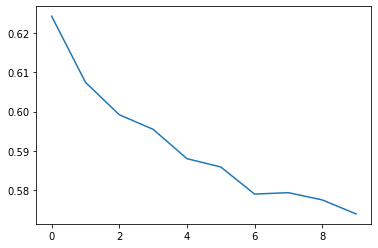

In [54]:
import matplotlib.pyplot as plt
temp = [t.detach().cpu().numpy() for t in tlr]
arr = np.array(temp)
print(arr.shape)

plt.plot(arr)

In [55]:
# if os.path.exists(os.getcwd()+'/model.pt'):
#     print('Loading checkpoint: %s' % os.getcwd()+'/model.pt')
#     path = torch.load(os.getcwd()+'/model.pt')
#     epoch = path['epoch']
#     model.load_state_dict(path['model'])
#     optimizer.load_state_dict(path['optimizer'])

In [56]:
result = []
prediction = []
model.eval()
with torch.no_grad():
    for idx, (data, target) in enumerate(test_dataloader):
        output = model(data)
        output_sm = nn.Softmax(dim=1)(output)
        _, predicted = torch.max(output, 1)
        prediction.append(predicted)
        result.append(output_sm)
        
result = torch.stack(result).detach().cpu().numpy()
prediction = torch.stack(prediction).detach().cpu().numpy()

print(result.shape, prediction.shape)

(1230, 16, 2) (1230, 16)


In [57]:
print(prediction.reshape(-1).shape)

(19680,)


In [58]:
import pandas as pd
res = pd.DataFrame(result.reshape(-1,2))
pred = pd.DataFrame(prediction.reshape(-1))

res.to_csv("/content/drive/MyDrive/iam_dataset/saved_model/results_transf_learn_conv_newdata.csv", header=False, index=False)
pred.to_csv("/content/drive/MyDrive/iam_dataset/saved_model/pred_transf_learn_conv_newdata.csv", header=False, index=False)

In [59]:
print(res.shape, pred.shape)

(19680, 2) (19680, 1)


In [60]:
y_test_new = y_test[:result.reshape(-1,2).shape[0]]

In [61]:
print(y_test_new.shape)

(19680,)


In [62]:
result_df = pd.DataFrame({'ground truth': y_test_new, 'NN output': prediction.reshape(-1), 'probs 0': res[0], 'probs 1': res[1]})
result_df

,ground truth,NN output,probs 0,probs 1
0,0.0,0,0.611310,0.388690
1,0.0,0,0.957066,0.042934
2,0.0,0,0.973080,0.026920
3,0.0,0,0.871069,0.128931
4,0.0,0,0.637640,0.362360
...,...,...,...,...
19675,0.0,0,0.886408,0.113592
19676,0.0,0,0.778134,0.221865
19677,0.0,0,0.831466,0.168534
19678,0.0,0,0.862241,0.137759


In [63]:
# work out the accuracy and other metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
actual = result_df['ground truth']
predicted = result_df['NN output']
# confusion matrix
matrix = confusion_matrix(actual, predicted, labels=[0,1])
print('Confusion matrix : \n',matrix)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual, predicted, labels=[0,1]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix_2 = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n',matrix_2)

Confusion matrix : 
 [[11547   396]
 [ 3463  4274]]
Outcome values : 
 11547 396 3463 4274
Classification report : 
               precision    recall  f1-score   support

           1       0.92      0.55      0.69      7737
           0       0.77      0.97      0.86     11943

    accuracy                           0.80     19680
   macro avg       0.84      0.76      0.77     19680
weighted avg       0.83      0.80      0.79     19680



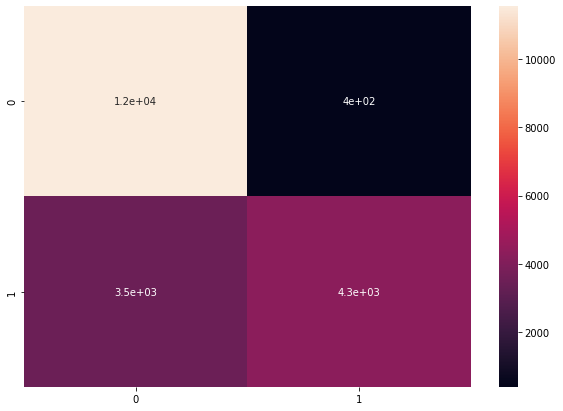

In [64]:
import seaborn as sn
df_cm = pd.DataFrame(matrix, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [67]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
matrix_3 = classification_report(actual,predicted,labels=[0,1], output_dict=True)
print('Classification report : \n',matrix_3)
accuracy_score(actual, predicted)

Classification report : 
 {'0': {'precision': 0.7692871419053964, 'recall': 0.9668425018839487, 'f1-score': 0.8568248432456499, 'support': 11943}, '1': {'precision': 0.915203426124197, 'recall': 0.552410495023911, 'f1-score': 0.6889659063431934, 'support': 7737}, 'accuracy': 0.8039126016260163, 'macro avg': {'precision': 0.8422452840147967, 'recall': 0.7596264984539298, 'f1-score': 0.7728953747944216, 'support': 19680}, 'weighted avg': {'precision': 0.8266527054725132, 'recall': 0.8039126016260163, 'f1-score': 0.7908327398506141, 'support': 19680}}


0.8039126016260163

In [66]:
matrix_df = pd.DataFrame(matrix).transpose()
matrix_3_df = pd.DataFrame(matrix_3).transpose()
matrix_df.to_csv("/content/drive/MyDrive/iam_dataset/saved_model/conf_matrix_transf_learn_conv_newdata.csv", header=False, index=False)
matrix_3_df.to_csv("/content/drive/MyDrive/iam_dataset/saved_model/classification_report_transf_learn_conv_newdata.csv", header=False, index=False)

# pd.to_csv("/content/drive/MyDrive/iam_dataset/saved_model/classification_report.txt",matrix)
